In [5]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt

from sklearn import linear_model
import statsmodels.formula.api as sm
import numpy as np
import math

from sklearn.cluster import KMeans 
%matplotlib inline

In [2]:
# Read in data
raw_df = pd.read_csv('../data/CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv',
                     header=0,
                     low_memory=False)

# raw_df = raw_df.append(pd.read_csv('../data/CollegeScorecard_Raw_Data/MERGED2015_16_PP.csv',
#                      header=0,
#                      low_memory=False))

# raw_df = raw_df.append(pd.read_csv('../data/CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv',
#                      header=0,
#                      low_memory=False))

# raw_df = raw_df.append(pd.read_csv('../data/CollegeScorecard_Raw_Data/MERGED2013_14_PP.csv',
#                      header=0,
#                      low_memory=False))

In [4]:
div_adm = ["UNITID", "INSTNM", "ADM_RATE","SAT_AVG", 
           "UGDS", "UGDS_WHITE",
           "UGDS_BLACK", "UGDS_HISP",
           "UGDS_ASIAN"]

# Remove majority/historic diverse schools
# Select demographics of interest
print(len(raw_df))
names = raw_df[(raw_df["HBCU"] == 1) | (raw_df["PBI"] == 1) | 
                  (raw_df["ANNHI"] == 1) | (raw_df["TRIBAL"] == 1) |
                  (raw_df["AANAPII"] == 1) | (raw_df["HSI"] == 1)]
names = names[['UNITID']]

filtered = raw_df[~raw_df['UNITID'].isin(names['UNITID'])]

print(len(filtered))

df = filtered[div_adm]
df = df.round(2).dropna()

#df['buck_adm'] = pd.cut(df['ADM_RATE'], bins=10, precision=2)
#df['buck_sat'] = pd.cut(df['SAT_AVG'], bins=15, precision=0)
#df = df[['buck_adm', 'buck_sat', 'UGDS_BLACK', 'UGDS_WHITE', 'UGDS_ASIAN', 'UGDS_HISP']].dropna()
print(len(df))

7175
7175
6442
1093


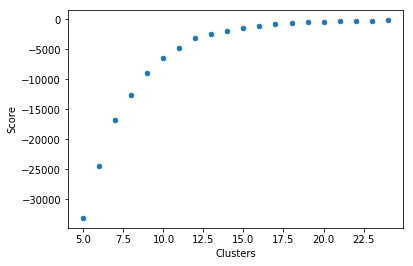

In [59]:
data = df[["ADM_RATE","SAT_AVG", "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP","UGDS_ASIAN"]]
labelled = df[["INSTNM","ADM_RATE","SAT_AVG", "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP","UGDS_ASIAN"]]
data = data[data["ADM_RATE"] < 0.25]
labelled = labelled[labelled["ADM_RATE"] < 0.25]

values = []
for i in range(5, 25):
    kmeans = KMeans(n_clusters=i, random_state=0)

    kmeans.fit(data)
    
    values.append([i, kmeans.score(data)])


values = np.array(values)
#values = np.reshape(values, (20,2))

v = pd.DataFrame({'Clusters' : values[:,0], 'Score' : values[:,1]})

v.plot.scatter(x='Clusters', y='Score')

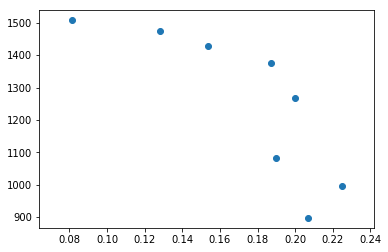

In [80]:
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

kmeans.fit(data)

plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1])

In [81]:
clusters = [[] for i in range(0,num_clusters)]
for i,k in enumerate(kmeans.labels_):
    clusters[k].append(labelled.values[i][0])
    
for r in clusters:
    print(str(r) + '\n')

['Oak Hills Christian College', 'Reading Hospital School of Health Sciences', 'Dallas Christian College']

['University of California-Berkeley', 'Claremont McKenna College', 'Pomona College', 'Georgetown University', 'Grinnell College', 'Amherst College', 'Tufts University', 'Williams College', 'Carleton College', 'Dartmouth College', 'Cornell University', 'Haverford College', 'Swarthmore College']

['College of the Ozarks', 'Liberty University']

['United States Merchant Marine Academy']

['Northwestern University', 'University of Notre Dame', 'Johns Hopkins University', 'Washington University in St Louis', 'Duke University', 'Carnegie Mellon University', 'University of Pennsylvania', 'Brown University', 'Rice University', 'Stanford University', 'Franklin W Olin College of Engineering']

['University of California-Los Angeles', 'University of Southern California', 'Colby College', 'Barnard College', 'Davidson College', 'Middlebury College', 'Washington and Lee University']

['Alice Ll

In [82]:
#np.set_printoptions(suppress=True,
   #formatter={'float_kind':'{:16.3f}'.format}, linewidth=130)
#pd.reset_option('all')

clust_df = pd.DataFrame(kmeans.cluster_centers_, columns=["ADM", "SAT", "WHITE", "BLACK", "HISP", "ASIAN"])

for i,r in enumerate(clust_df.sort_values(by=["ADM", "SAT"]).iterrows()):
    print(r)
    print(clusters[i])


(7, ADM         0.081111
SAT      1507.777778
WHITE       0.405556
BLACK       0.058889
HISP        0.121111
ASIAN       0.214444
Name: 7, dtype: float64)
['Oak Hills Christian College', 'Reading Hospital School of Health Sciences', 'Dallas Christian College']
(4, ADM         0.128182
SAT      1473.272727
WHITE       0.451818
BLACK       0.060000
HISP        0.107273
ASIAN       0.190000
Name: 4, dtype: float64)
['University of California-Berkeley', 'Claremont McKenna College', 'Pomona College', 'Georgetown University', 'Grinnell College', 'Amherst College', 'Tufts University', 'Williams College', 'Carleton College', 'Dartmouth College', 'Cornell University', 'Haverford College', 'Swarthmore College']
(1, ADM         0.153846
SAT      1429.692308
WHITE       0.476154
BLACK       0.062308
HISP        0.111538
ASIAN       0.141538
Name: 1, dtype: float64)
['College of the Ozarks', 'Liberty University']
(5, ADM         0.187143
SAT      1375.714286
WHITE       0.564286
BLACK       0.04142